# Pandas
: This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go. Numpy : Numpy arrays are very fast and can perform large computations in a very short time. Matplotlib / Seaborn : This library is used to draw visualizations. To importing all these libraries, we can use the below code :



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir("C:\\Users\\5518\\Downloads")

# To fetch insights from  the behavior of common Uber customer

In [3]:
df = pd.read_csv("uber .csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [5]:
df.shape

(1156, 7)

In [6]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

# checking for  Null values

In [7]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [8]:
df[df["END_DATE"].isna()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


 As we can see this row contains wrong data for most of the columns.we will delete it 

In [9]:
# Dropping row containing null values

df.drop(df[df["END_DATE"].isna()].index, axis=0,inplace=True)

In [10]:
df.isna().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

# Now we have null data only in Purpose Column.
# AS we have more than 55% data missing . So I am dropping this column and exculding this form this analysis
### You May also delete  the null value  rows and include  this column in the Analysis

<Axes: xlabel='count', ylabel='PURPOSE'>

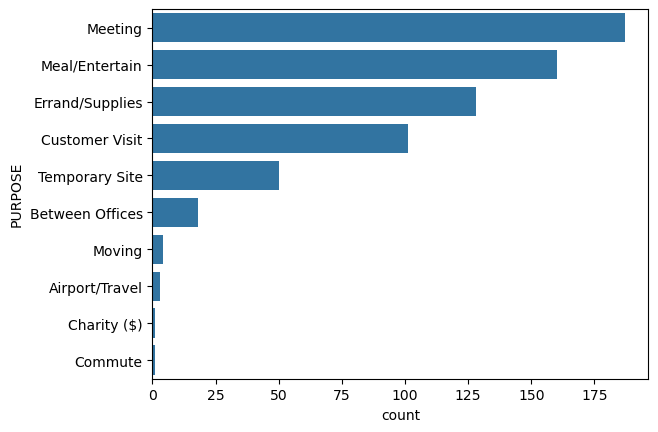

In [11]:
sns.countplot(df['PURPOSE'],order = df["PURPOSE"].value_counts().index)

In [12]:
#Dropping Purpose
df.drop(["PURPOSE"],axis=1,inplace=True)
df.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0


# Checking for a duplicate rows

In [13]:
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9


We will remove this duplicate row

In [14]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)

In [15]:
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES


# Converting start_date and End_date cols into datetime

In [16]:


df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='%d-%m-%Y %H:%M', errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='%d-%m-%Y %H:%M', errors='coerce')


In [17]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
dtype: object

# EDA - Exploratory Data Analysis


# 1.Category

In [18]:
df['CATEGORY'].unique()

array(['Business', 'Personal'], dtype=object)

 There are two ride - categories...Business: For Work related  & Personal :For Personal travel

In [19]:
df[['CATEGORY', 'MILES']].groupby(['CATEGORY']).agg(tot_miles=('MILES', 'sum'))


,tot_miles
CATEGORY,
Business,11477.1
Personal,717.7


Text(0.5, 1.0, 'Total Miles per Category')

<Figure size 640x480 with 0 Axes>

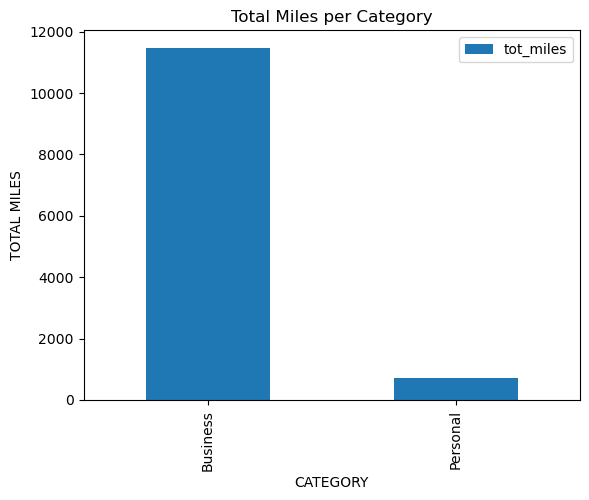

In [20]:
plt.figure()
df[['CATEGORY','MILES']].groupby(['CATEGORY']).agg(tot_miles=('MILES', 'sum')).plot(kind='bar')
plt.xlabel('CATEGORY')
plt.ylabel('TOTAL MILES')
plt.title('Total Miles per Category')


# User mainly uses Uber cabs for  its Business Purposes
.Around 94 % miles was consumed during  Business trips

.Only 6% miles were  consumed  during personal tips 
    
    

# START

In [21]:
len(df['START'].unique())

177

There are 177 unique starting points

In [22]:
# TOP 10 Start  places
df['START'].value_counts(ascending=False)[:10]

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Pickup places'}, xlabel='Places', ylabel='Pickup Count'>

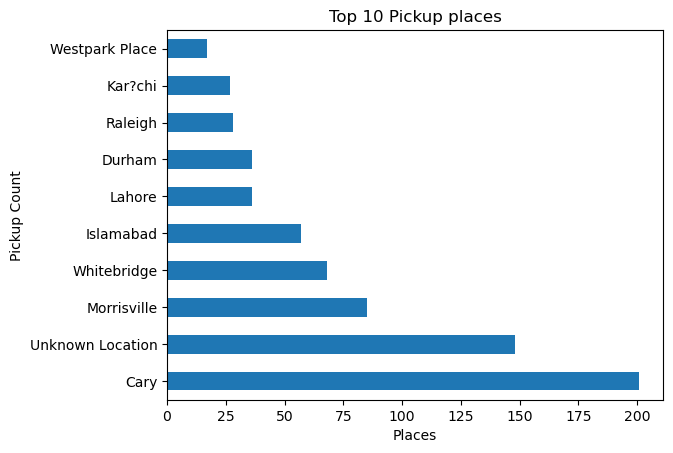

In [23]:
df['START'].value_counts(ascending=False)[:10].plot(kind='barh',xlabel='Places',ylabel='Pickup Count',title='Top 10 Pickup places')

# Stop

In [24]:
len(df['STOP'].unique())

188

In [27]:
# Top 10 Stop Places 
df["STOP"].value_counts(ascending= False)[:10]

STOP
Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: count, dtype: int64

<Axes: title={'center': 'TOP 10 Drop places'}, xlabel='Places', ylabel='Pickup count'>

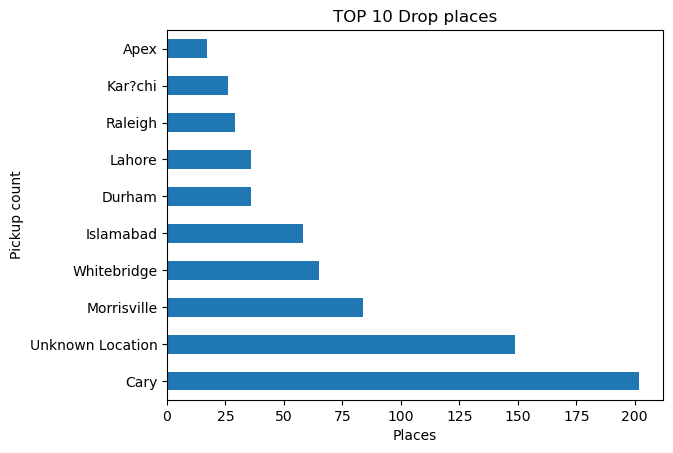

In [28]:
df["STOP"].value_counts(ascending= False)[:10].plot(kind = 'barh', xlabel='Places', ylabel='Pickup count',title='TOP 10 Drop places')

### Carry is the most popular place for  this user

### Maybe his home is in carry (as mostly start or stop  are from here)

In [29]:
df[df["START"]=="Unknown Location"]['START'].value_counts()

START
Unknown Location    148
Name: count, dtype: int64

In [30]:
df[df["STOP"]=="Unknown Location"]["STOP"].value_counts()

STOP
Unknown Location    149
Name: count, dtype: int64

# MILES

<Axes: xlabel='MILES', ylabel='Count'>

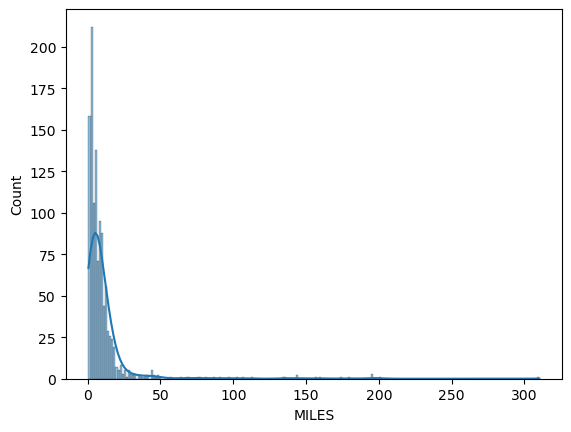

In [31]:
sns.histplot(df['MILES'], kde=True)

Miles data is right skewed

In [32]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
START_DATE,421,2016-06-25 16:54:32.351544064,2016-01-01 21:11:00,2016-03-12 20:31:00,2016-07-03 09:10:00,2016-10-05 17:19:00,2016-12-12 20:48:00,NaN
END_DATE,420,2016-06-25 21:12:52.999999744,2016-01-01 21:17:00,2016-03-12 20:19:30,2016-07-03 03:00:00,2016-10-05 11:22:45,2016-12-12 20:57:00,NaN
MILES,1154.0,10.567418,0.5,2.9,6.0,10.4,310.3,21.588452


# Multivariate

In [34]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7


In [35]:
df.groupby(['START','STOP'])['MILES'].apply(print)

910    2.2
Name: (Agnew, Agnew), dtype: float64
906    4.3
Name: (Agnew, Cory), dtype: float64
908    2.2
911    2.4
Name: (Agnew, Renaissance), dtype: float64
879    15.2
Name: (Almond, Bryson City), dtype: float64
646    1.0
825    3.3
Name: (Apex, Apex), dtype: float64
58      5.5
60      5.7
80      5.7
173     5.6
410     7.2
565     5.5
616     4.6
647     6.0
826     5.3
978     5.4
1014    5.3
1033    8.8
1045    4.7
Name: (Apex, Cary), dtype: float64
855    2.2
Name: (Apex, Eagle Rock), dtype: float64
1001    9.0
Name: (Apex, Holly Springs), dtype: float64
469    17.0
Name: (Arabi, Metairie), dtype: float64
621    4.9
Name: (Arlington, Washington), dtype: float64
613    1.3
Name: (Arlington Park at Amberly, Lexington Park at Amberly), dtype: float64
881    195.9
Name: (Asheville, Mebane), dtype: float64
871    91.8
Name: (Asheville, Topton), dtype: float64
232    136.0
Name: (Austin, Katy), dtype: float64
547     8.3
548     3.2
551     4.5
556    13.0
557     4.4
Name: (Banne

START          STOP              
Agnew          Agnew                 None
               Cory                  None
               Renaissance           None
Almond         Bryson City           None
Apex           Apex                  None
                                     ... 
Whitebridge    Wayne Ridge           None
               Westpark Place        None
               Whitebridge           None
               Williamsburg Manor    None
Winston Salem  Asheville             None
Name: MILES, Length: 363, dtype: object

In [36]:
df.groupby(['START','STOP'])['MILES'].sum().sort_values(ascending= False)[1:11]

START             STOP            
Morrisville       Cary                395.7
Cary              Durham              390.0
                  Morrisville         380.0
Raleigh           Cary                365.7
Cary              Raleigh             336.5
Durham            Cary                324.5
Latta             Jacksonville        310.3
Islamabad         Unknown Location    267.0
Cary              Cary                255.9
Unknown Location  Islamabad           243.8
Name: MILES, dtype: float64

Carry-Durham & Carry-Morrisville and  vice versa are the farthest distance ride


checking for Round Trip

In [39]:
def is_roundtrip(df):
    if df['START'] == df['STOP']:
       return 'YES'
    else:
        return 'No'
    df['ROUND_TRIP'] = df.apply(is_roundtrip, axis=1)
    

In [40]:
df['ROUND_TRIP'] = df.apply(is_roundtrip, axis=1)

<Axes: xlabel='ROUND_TRIP', ylabel='count'>

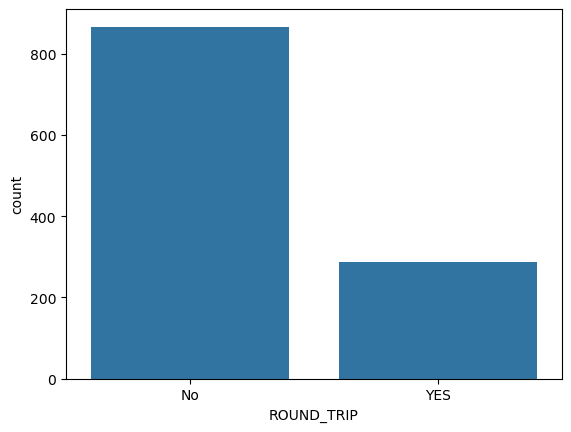

In [41]:
sns.countplot(x='ROUND_TRIP',data= df, order= df['ROUND_TRIP'].value_counts().index)
    

In [42]:
df['ROUND_TRIP'].value_counts()

ROUND_TRIP
No     866
YES    288
Name: count, dtype: int64